In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
import os
import matplotlib
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path 
from keras.optimizers import Adam
from keras import backend
from keras import optimizers
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
np.random.seed(1001)

Using TensorFlow backend.


In [0]:
!pwd
%cd "drive/My Drive/CVProject"
!pwd

/content
/content/drive/My Drive/CVProject
/content/drive/My Drive/CVProject


In [0]:
class_names = os.listdir('UCMerced_LandUse/Train/')
target_dirs = {target: './UCMerced_LandUse/' + target for target in ['Train', 'Validation', 'Test']}

In [0]:
batch_size = 64
train_data_generator =  ImageDataGenerator(rescale=1/255.0,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)
train_image_generator = train_data_generator.flow_from_directory(target_dirs['Train'],
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       shuffle=True)
test_data_generator =  ImageDataGenerator(rescale=1/255.0)
test_image_generator = test_data_generator.flow_from_directory(target_dirs['Test'],
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       shuffle=True)
validation_data_generator =  ImageDataGenerator(rescale=1/255.0)
validation_image_generator = validation_data_generator.flow_from_directory(target_dirs['Validation'],
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       shuffle=True) 
def getDataUsingDataGenerators(dataset):
    print(dataset)
    if dataset == 'Train':
     image_generator = train_image_generator
    elif dataset == 'Validation':
      image_generator = validation_image_generator
    else:
      image_generator = test_image_generator
    image_count = 0
    X_batches, Y_batches = [], []
    for X, Y in image_generator:
      X_batches.append(X)
      Y_batches.append(Y)
      image_count += X.shape[0]
      # Must interrupt image_generator
      if image_count >= image_generator.n:
        break
    X = np.concatenate(X_batches)
    Y = np.concatenate(Y_batches)
    return X, Y 

Found 1785 images belonging to 21 classes.
Found 210 images belonging to 21 classes.
Found 210 images belonging to 21 classes.


In [0]:
num_classes = len(class_names)
X, Y = dict(), dict()
for dataset in [ 'Validation', 'Test','Train']:
    # Extract bottleneck features from pretrained model, predicting from "dataset" directory
    X[dataset], Y[dataset] = getDataUsingDataGenerators(dataset)

Validation
Test
Train


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
def build_model(input_shape, num_classes):
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(units=21,activation="softmax"))
  return model

In [0]:
model = build_model(input_shape=X['Train'].shape[1:], num_classes=num_classes)
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 128)    

In [0]:
model_fit_history = model.fit_generator(train_image_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=150,
        validation_data=validation_image_generator,
        validation_steps=800 // batch_size)

Epoch 1/150
31/31 [==============================] - 39s 1s/step - loss: 4.0464 - accuracy: 0.2281 - val_loss: 4.6869 - val_accuracy: 0.0476
Epoch 2/150
31/31 [==============================] - 35s 1s/step - loss: 1.9273 - accuracy: 0.4370 - val_loss: 9.0394 - val_accuracy: 0.0476
Epoch 3/150
31/31 [==============================] - 35s 1s/step - loss: 1.5876 - accuracy: 0.5071 - val_loss: 12.1313 - val_accuracy: 0.0476
Epoch 4/150
31/31 [==============================] - 35s 1s/step - loss: 1.3653 - accuracy: 0.5685 - val_loss: 9.2542 - val_accuracy: 0.0476
Epoch 5/150
31/31 [==============================] - 35s 1s/step - loss: 1.1048 - accuracy: 0.6462 - val_loss: 10.5760 - val_accuracy: 0.0476
Epoch 6/150
31/31 [==============================] - 35s 1s/step - loss: 1.1232 - accuracy: 0.6482 - val_loss: 10.3473 - val_accuracy: 0.0476
Epoch 7/150
31/31 [==============================] - 35s 1s/step - loss: 1.0398 - accuracy: 0.6635 - val_loss: 11.5869 - val_accuracy: 0.0476
Epoch 8/1

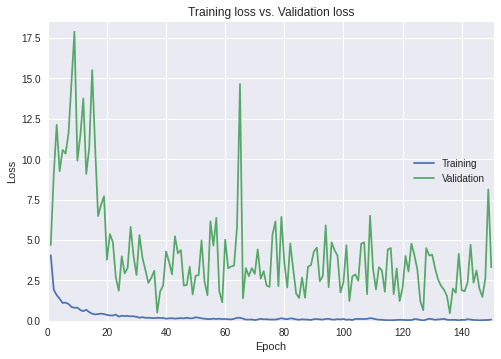

In [0]:
matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['loss'])
max_loss = max(max(model_fit_history.history['loss']), max(model_fit_history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['loss'])
plt.plot(x, model_fit_history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

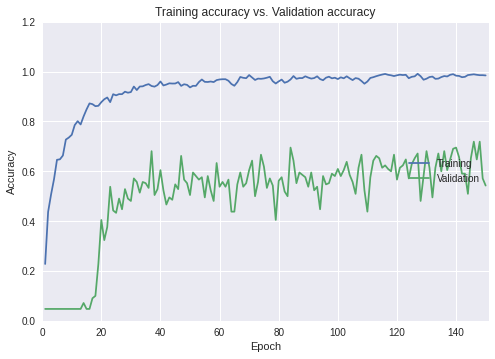

In [0]:
matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['accuracy'])
plt.plot(x, model_fit_history.history['val_accuracy'])
plt.title('Training accuracy vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

In [0]:
y_pred = model.predict_classes(X['Test'], verbose=0)

In [0]:
y_test = np.nonzero(Y['Test'])[1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Model predication accuracy: {accuracy:.3f}')
print(f'\nClassification report:\n {classification_report(y_test, y_pred)}')

Model predication accuracy: 0.562

Classification report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.20      0.33        10
           2       0.37      0.70      0.48        10
           3       1.00      0.30      0.46        10
           4       1.00      0.40      0.57        10
           5       0.83      1.00      0.91        10
           6       0.50      0.10      0.17        10
           7       0.91      1.00      0.95        10
           8       0.42      0.50      0.45        10
           9       0.18      0.40      0.25        10
          10       1.00      0.10      0.18        10
          11       1.00      0.80      0.89        10
          12       0.29      0.60      0.39        10
          13       0.60      0.30      0.40        10
          14       0.75      0.90      0.82        10
          15       1.00      0.90      0.95        10
          16       0.9